In [1]:
import numpy as np
import matplotlib.pyplot as plt

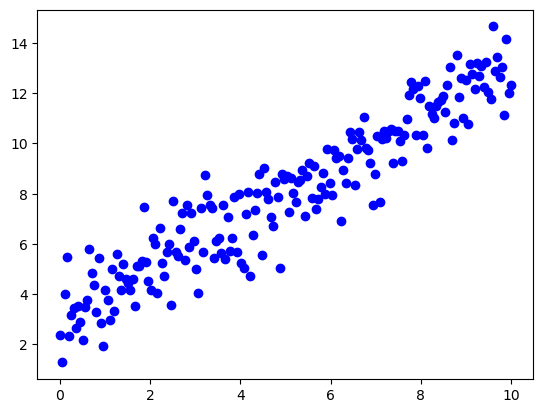

In [12]:
# y = 1*x + 3
# y = a*x + b
# 0 < x < 10
a = 1   # Representa la inclinación de la línea, cuanto más grande sea el valor más inclinación tendrá.
b = 3   # Representa la altura en la que comienza la línea.
lx = np.linspace(0, 10, 200)
ly = a*lx + b
ruido = np.random.randn(200)    # Me genera la cantidad de números aleatorios que le propongo .
ly = ly + ruido


# plt.plot(lx, ly, color = 'b') # Para que una todos los puntos con una línea.
plt.scatter(lx, ly, color = 'b') # Para pintar los puntos en el gráfico.


# ESTOS SON LOS PUNTOS DE DONDE PARTIMOS, REPRESENTANDO EL PESO CORPORAL (Y) Y LA ALTURA (X) DE CADA PERSONA

In [14]:
a = 10
b = 10

In [27]:
def predice(x):
    y_hat = a*x + b # Calcula las Ys que le corresponde a cada X.
    return y_hat

# Función que calcula el error de cada punto nuevo hecho
# Se pasan las 'x' y las y reales 'y' decuelce el array de errores de cada 'x'
def error(x, y):
    y_hat = predice(x)
    err = y_hat - y
    return err

# Se le pasan las 'x' y las 'y' reales y devuelve el coste cuadrático medio
# 1/(2n) * ∑(yi_hat - yi)²
def coste(x, y):
    err = error(x,y)
    c = err**2
    c = c.mean()
    c = c/2
    return c

pru_x  [0.50251256 2.51256281 5.02512563]
pru_y  [2.16143584 7.69412428 8.70927712]
estimados por el modelo  [ 10  60 110]
error  [12.86368979 27.43150386 51.54197916]
coste  [12.86368979 27.43150386 51.54197916]


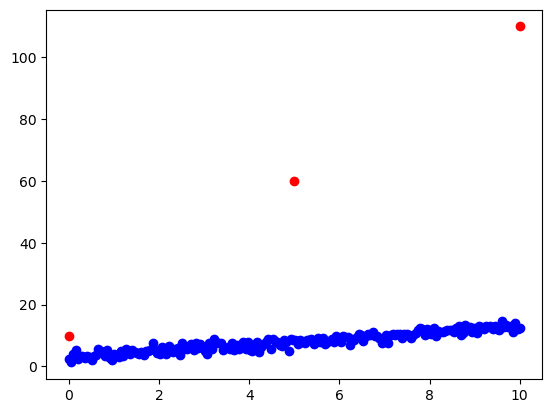

In [29]:
plt.scatter(lx, ly, color = 'b')
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])

y_hat = predice(np.array([0,5,10]))
plt.scatter([0, 5, 10], y_hat, color="r")
le = error(pru_x, pru_y )
c = coste(pru_x, pru_y)
print("pru_x ", pru_x)
print("pru_y ", pru_y)
print("estimados por el modelo ", y_hat)
print("error ", le)
print("coste ", le)